# <center>MACHINE LEARNING <br> <br> Problem Session 3 <br> Gaussian Mixture Models</center>

**USEFULL PYTHON FUNCTIONS**
- **mu = np.mean(X)** returns the mean of X taking each row as a sample, i.e., if X is a $n\times m$ matrix, **np.mean(X)** is a $1 \times m$ matrix.<br>
To compute the mean along the columns (taking each column as a sample), **np.mean(X, axis = 1)**.
<br>

- **Cov = np.cov(X)** returns the covariance matrix of X considering each column as a sample.
<br>

- **X_inv = np.linalg.inv(X)** returns the inverse of a matrix X.
<br>

- **s = np.dot(A,B)** returns the dot product of A and B (can be matrices).
<br>

- **theta = np.arccos(a)** returns the arccos (cos$^{-1}$) of a $\in [-1,1]$, i.e, an angle $\theta$ (in radians) such that cos($\theta$) = a.
<br>

- **u,s,v = np.linalg.svd(A)** returns the matrices U, D, and V$^T$ such that A = UDV$^T$. <br>
u, s, vh = np.linalg.svd(A) $\Rightarrow$ smat = np.diag(s), A = np.dot(u, np.dot(smat, vh))
<br>

- **plt.scatter(x,y)** plots the points (as dots) whose x-coordinates is given by the array x and whose y-coordinates is given by y.
<br>

- **plt.plot(x,y)** same as plt.scatter but with lines (other options are available).

In [4]:
################################
# NEEDED IMPORTS AND FUNCTIONS #
################################

# LLIBRERIES
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as multiNorm


# DRAWING FUNCTIONS
def draw_vector(p,v):
    # Plots the vector v with  origin at point p
    plt.quiver(p[0],p[1], v[0], v[1])
    plt.axis('equal')
    
def draw_segment(A,B):
    # Plots a segment of a line from point A to point B
    if np.isclose(A[0],B[0],atol=1e-2):
        y = np.linspace(A[1],B[1],100)
        x = np.ones(y.shape) * A[0]
    else:
        x = np.linspace(A[0],B[0],100)
        y = A[1] + (x - A[0]) * (B[1]-A[1])/(B[0]-A[0])
        
    # draw the curve
    plt.plot(x, y)
    plt.axis('equal')


### Exercise 1

Consider two different Gaussian models, $G_1$ and $G_2$ with means and covariances:
$$
\mu_1 = \begin{bmatrix}-1\\0\end{bmatrix}, \Sigma_1 = \begin{bmatrix}3 & 0\\0 & 1\end{bmatrix},\\
\mu_2 = \begin{bmatrix}0\\4\end{bmatrix}, \Sigma_2 = \begin{bmatrix}2 & -1\\-1 & 2\end{bmatrix}.
$$

(*In Jupyter Notebook*) Draw 500 random samples from a mixture of Gaussians $G_1$ and $G_2$ for different values of the mixing coefficients (modeling point of view).

For example, this figure shows 1000 random samples using $\pi_A = 0.1$ and $\pi_B = 0.9$.

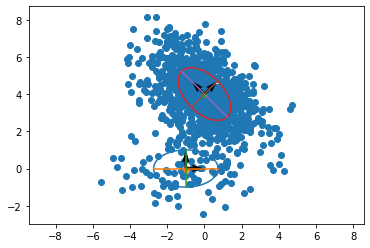

In [5]:
##########################################
# FUNCTIONS FROM P2

def PC_and_Mhd(mu,Cov,k):
    u, s, vh = np.linalg.svd(Cov)

    a = np.sqrt(s[0]) * k
    b = np.sqrt(s[1]) * k
    t = np.linspace(0, 2*np.pi, 200)
    
    newBasis = np.dot( u, np.array([a*np.cos(t),b*np.sin(t)]) )
    plt.plot(newBasis[0,:]+mu[0],newBasis[1,:]+mu[1])

    return u, s



def Gaussian_model(X):

    mu = np.mean(X,axis = 1)
    Cov = np.cov(X)

    plt.scatter(X[0,:], X[1,:])
    plt.axis('equal')
    
    u, s = PC_and_Mhd(mu,Cov,1)
    u, s = PC_and_Mhd(mu,Cov,2)
    u, s = PC_and_Mhd(mu,Cov,3)
    
    return mu, u, s

def draw_samples_from_Gaussian(mu,Cov,n):
    X = np.random.multivariate_normal(mu,Cov,n)
    return X

##########################################



mu1 = np.array([-1,0])
Cov1 = np.array([[3,0],[0,1]])
mu2 = np.array([0,4])
Cov2 = np.array([[2,-1],[-1,2]])

N = 1000
w1 = 0.1
w2 = 1 - w1

U = np.random.uniform(0,1,N)
N1 = np.sum(U <= w1)
N2 = N-N1
X = np.empty([2,N])
X[:,0:N1] = np.random.multivariate_normal(mu1,Cov1,N1).T
X[:,N1:] = np.random.multivariate_normal(mu2,Cov2,N2).T
    
    
plt.scatter(X[0,:],X[1,:])


# G1
u1,s1 = PC_and_Mhd(mu1,Cov1,1)
a1 = np.sqrt(s1[0])
b1 = np.sqrt(s1[1])
draw_segment(mu1+a1*u1[:,0], mu1-a1*u1[:,0])
draw_segment(mu1+b1*u1[:,1], mu1-b1*u1[:,1])
plt.scatter(mu1[0],mu1[1])
draw_vector(mu1,u1[:,0])
draw_vector(mu1,u1[:,1])

# G2
u2,s2 = PC_and_Mhd(mu2,Cov2,1)
a2 = np.sqrt(s2[0])
b2 = np.sqrt(s2[1])
plt.scatter(mu2[0],mu2[1])
draw_segment(mu2+a2*u2[:,0], mu2-a2*u2[:,0])
draw_segment(mu2+b2*u2[:,1], mu2-b2*u2[:,1])
draw_vector(mu2,u2[:,0])
draw_vector(mu2,u2[:,1])

plt.show()

### Exercise 2

*Computations*

a) Draw the ellipses of Mahalanobis distance = 1 of the Gaussian models
G1: lambda_1 = 1.0, v1 = [1. 0.]
G1: lambda_2 = 1.0, v2 = [0. 1.]
G2: lambda_1 = 2.9999999999999996, v1 = [-0.70710678  0.70710678]
G2: lambda_2 = 1.0000000000000002, v2 = [0.70710678 0.70710678]


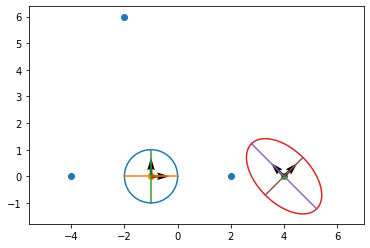


b) Expectation: Compute responsabilities
r11 = P(x1 ~ G1) = P(1 | x1) = 0.9999999929407981
r12 = P(x1 ~ G2) = P(2 | x1) = 7.059201838660242e-09
r21 = P(x2 ~ G1) = P(1 | x2) = 0.22599487706023996
r22 = P(x2 ~ G2) = P(2 | x2) = 0.7740051229397601
r31 = P(x3 ~ G1) = P(1 | x3) = 0.010308754918505721
r32 = P(x3 ~ G2) = P(2 | x3) = 0.9896912450814943

c) Maximisation: Compute new means, covariance matrices and mixing coefficients
new mu_1 = [-2.88653018  0.05003021]
new mu_2 = [-0.2445842   3.36687627]
new Cov_1 = [[5.37429693 0.04435329]
 [0.04435329 0.29767824]]
new Cov_2 = [[ 3.94017862 -5.91026779]
 [-5.91026779  8.8654018 ]]
new pi_1 = 0.4121012083065146
new pi_2 = 0.5878987916934855

d) Convergence: Compute the log-likelihood
log-likelihood = -4.474847265482076

e) Plot the new Gaussian models


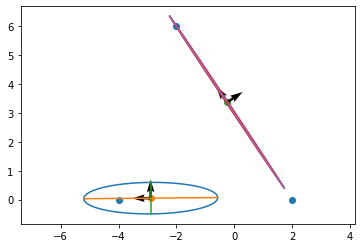

In [3]:
X = np.array([[-4,2,-2],[0,0,6]])
pi1 = 0.8
mu1 = np.array([-1,0])
Cov1 = np.array([[1,0],[0,1]])

pi2 = 0.2
mu2 = np.array([4,0])
Cov2 = np.array([[2,-1],[-1,2]])

# a
print('a) Draw the ellipses of Mahalanobis distance = 1 of the Gaussian models')
eigVec1,eigVal1,v = np.linalg.svd(Cov1)
eigVec2,eigVal2,v = np.linalg.svd(Cov2)

print('G1: lambda_1 = {}, v1 = {}'.format(eigVal1[0],eigVec1[:,0]))
print('G1: lambda_2 = {}, v2 = {}'.format(eigVal1[1],eigVec1[:,1]))
print('G2: lambda_1 = {}, v1 = {}'.format(eigVal2[0],eigVec2[:,0]))
print('G2: lambda_2 = {}, v2 = {}'.format(eigVal2[1],eigVec2[:,1]))


plt.scatter(X[0,:],X[1,:])
# G1
u1,s1 = PC_and_Mhd(mu1,Cov1,1)
a1 = np.sqrt(s1[0])
b1 = np.sqrt(s1[1])
draw_segment(mu1+a1*u1[:,0], mu1-a1*u1[:,0])
draw_segment(mu1+b1*u1[:,1], mu1-b1*u1[:,1])
plt.scatter(mu1[0],mu1[1])
draw_vector(mu1,u1[:,0])
draw_vector(mu1,u1[:,1])

# G2
u2,s2 = PC_and_Mhd(mu2,Cov2,1)
a2 = np.sqrt(s2[0])
b2 = np.sqrt(s2[1])
plt.scatter(mu2[0],mu2[1])
draw_segment(mu2+a2*u2[:,0], mu2-a2*u2[:,0])
draw_segment(mu2+b2*u2[:,1], mu2-b2*u2[:,1])
draw_vector(mu2,u2[:,0])
draw_vector(mu2,u2[:,1])

plt.show()



# b: EXPECTATION
print('\nb) Expectation: Compute responsabilities')

r11 = pi1 * multiNorm.pdf(X[:,0],mu1,Cov1) / ( pi1 * multiNorm.pdf(X[:,0],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,0],mu2,Cov2) )
r12 = pi2 * multiNorm.pdf(X[:,0],mu2,Cov2) / ( pi1 * multiNorm.pdf(X[:,0],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,0],mu2,Cov2) )

print('r11 = P(x1 ~ G1) = P(1 | x1) = {}'.format(r11))
print('r12 = P(x1 ~ G2) = P(2 | x1) = {}'.format(r12))

r21 = pi1 * multiNorm.pdf(X[:,1],mu1,Cov1) / ( pi1 * multiNorm.pdf(X[:,1],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,1],mu2,Cov2) )
r22 = pi2 * multiNorm.pdf(X[:,1],mu2,Cov2) / ( pi1 * multiNorm.pdf(X[:,1],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,1],mu2,Cov2) )

print('r21 = P(x2 ~ G1) = P(1 | x2) = {}'.format(r21))
print('r22 = P(x2 ~ G2) = P(2 | x2) = {}'.format(r22))

r31 = pi1 * multiNorm.pdf(X[:,2],mu1,Cov1) / ( pi1 * multiNorm.pdf(X[:,2],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,2],mu2,Cov2) )
r32 = pi2 * multiNorm.pdf(X[:,2],mu2,Cov2) / ( pi1 * multiNorm.pdf(X[:,2],mu1,Cov1) + pi2 * multiNorm.pdf(X[:,2],mu2,Cov2) )

print('r31 = P(x3 ~ G1) = P(1 | x3) = {}'.format(r31))
print('r32 = P(x3 ~ G2) = P(2 | x3) = {}'.format(r32))




# c: MAXIMISATION
print('\nc) Maximisation: Compute new means, covariance matrices and mixing coefficients')
rn1 = np.array([r11,r21,r31])
rn2 = np.array([r12,r22,r32])
N1 = r11 + r21 + r31
N2 = r12 + r22 + r32

new_mu1 = ( r11*X[:,0] + r21*X[:,1] + r31*X[:,2] ) / N1
new_mu2 = ( r12*X[:,0] + r22*X[:,1] + r32*X[:,2] ) / N2
new_mu1 = np.dot( X, rn1 ) / N1 # does the same as above

print('new mu_1 = {}'.format(new_mu1))
print('new mu_2 = {}'.format(new_mu2))


new_Cov1 = ( np.dot( (X.T-new_mu1).T*rn1, (X.T-new_mu1) ) ) / N1
new_Cov2 = ( np.dot( (X.T-new_mu2).T*rn2, (X.T-new_mu2) ) ) / N2

print('new Cov_1 = {}'.format(new_Cov1))
print('new Cov_2 = {}'.format(new_Cov2))

new_pi1 = N1 / X.shape[1]
new_pi2 = N2 / X.shape[1]

print('new pi_1 = {}'.format(new_pi1))
print('new pi_2 = {}'.format(new_pi2))


# d: CONVERGENCE
u,s,v = np.linalg.svd(new_Cov2)
s[1] = 0.001
new_Cov2 = np.dot(np.dot(u,np.diag(s)),v)

print('\nd) Convergence: Compute the log-likelihood')
px1 = new_pi1 * multiNorm.pdf(X[:,0],new_mu1,new_Cov1) + new_pi2 * multiNorm.pdf(X[:,0],new_mu2,new_Cov2)
px2 = new_pi1 * multiNorm.pdf(X[:,1],new_mu1,new_Cov1) + new_pi2 * multiNorm.pdf(X[:,1],new_mu2,new_Cov2)
px3 = new_pi1 * multiNorm.pdf(X[:,2],new_mu1,new_Cov1) + new_pi2 * multiNorm.pdf(X[:,2],new_mu2,new_Cov2)

logL = np.log(px1) + np.log(px2) + np.log(px3)

print('log-likelihood = {}'.format(logL))



# e: PLOT
print('\ne) Plot the new Gaussian models')
plt.scatter(X[0,:],X[1,:])
# G1
u1,s1 = PC_and_Mhd(new_mu1,new_Cov1,1)
a1 = np.sqrt(s1[0])
b1 = np.sqrt(s1[1])
draw_segment(new_mu1+a1*u1[:,0], new_mu1-a1*u1[:,0])
draw_segment(new_mu1+b1*u1[:,1], new_mu1-b1*u1[:,1])
plt.scatter(new_mu1[0],new_mu1[1])
draw_vector(new_mu1,u1[:,0])
draw_vector(new_mu1,u1[:,1])

# G2
u2,s2 = PC_and_Mhd(new_mu2,new_Cov2,1)
a2 = np.sqrt(s2[0])
b2 = np.sqrt(s2[1])
plt.scatter(new_mu2[0],new_mu2[1])
draw_segment(new_mu2+a2*u2[:,0], new_mu2-a2*u2[:,0])
draw_segment(new_mu2+b2*u2[:,1], new_mu2-b2*u2[:,1])
draw_vector(new_mu2,u2[:,0])
draw_vector(new_mu2,u2[:,1])

plt.show()

### Exercise 3

You are hired as a data scientist by a supermarket mall. They want a better knowledge about their customers to be able to make more targeted advertising campaings. 
Through membership cards, they have some basic data about the customers like Customer ID, age, gender, annual income and spending score and they ask you to apply clustering to detect different customer profiles.

In this exercise we use the following dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python . We start opening the dataset and keeping only the two last columns that correspond to anual income and spending score, since this are the features that we have been told to analyse:

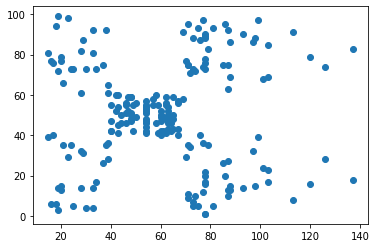

In [69]:
from numpy import genfromtxt
from sklearn.mixture import GaussianMixture
import sklearn

X = genfromtxt('Mall_Customers.csv', delimiter=',')
X=np.delete(X,0,0)
X=np.delete(X,[0,1,2],1)
plt.scatter(X[:,0],X[:,1])


a) Find clusters in the dataset by using mixture of gaussians. Try with different values of $k$ and compute the silhouette score for each one. Choose one value of $k$ (and justify your election) to do the following parts.

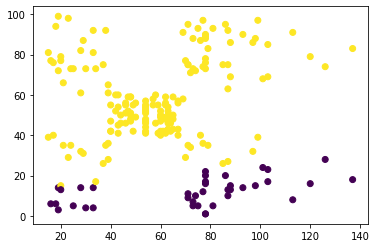

k= 2: 0.38520627575593025
k= 3: 0.3655549446234572
k= 4: 0.45009868296154987
k= 5: 0.5528243704895652
k= 6: 0.535841495703499
k= 7: 0.44806138860028727
k= 8: 0.4809437849291923
k= 9: 0.45220883171704074
k= 10: 0.439497729001123


In [80]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels=gm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

# YOUR CODE HERE
for k in np.arange(9):
    gm = GaussianMixture(n_components=k+2, random_state=0).fit(X)
    gm.means_
    #print(gm.means_)
    #print(gm.covariances_)

    labels=gm.predict(X)

    print("k= "+str(k+2)+":",sklearn.metrics.silhouette_score(X, labels))




b) Take the gaussians found with the selected $k$ and plot the clusters with different colors. Show also the mean and variance of each gaussian. Use this information to make a brief description of the kind of customers in each cluster.

[[88.79768858 16.14155872]
 [86.23999748 82.01992328]
 [27.06801679 22.22634172]
 [55.71388271 49.41710796]
 [25.11610902 80.12933484]]
[[[270.64685317  51.576131  ]
  [ 51.576131    84.05538074]]

 [[269.19229949  -3.70717696]
  [ -3.70717696  87.94022767]]

 [[ 67.79318204  31.28737641]
  [ 31.28737641 185.22676448]]

 [[ 91.08677592 -27.69406883]
  [-27.69406883  49.47439449]]

 [[ 50.19862428  -1.69376531]
  [ -1.69376531  98.52096979]]]


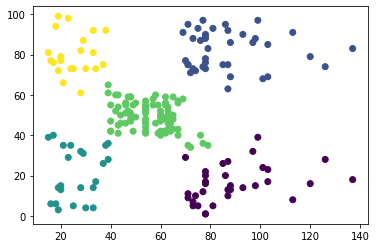

In [81]:
# YOUR CODE HERE
gm = GaussianMixture(n_components=5, random_state=0).fit(X)
labels=gm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels)
print(gm.means_)
print(gm.covariances_)


c) The marketing team wants to incorporate some luxury products to the supermarket. They want to track the purchases of those clients that could be interested in luxury products to know their interests and build the marketing campign according to this. They ask you to tell them which costumers could be potentially interested in this kind of products. Reason your answer.

d) A new customer downloaded the app of the supermarket two weeks ago and has an anual income of $40k $ and a spending score of $30k $. Use your GMM to predict to which cluster does he belong. Should he be a target of the luxury advertisement campaign? Why?

In [79]:
# YOUR CODE HERE
y=gm.predict([[40,30]])
print(y)

[2]
